# 对数几率回归(logistic regression)  P57

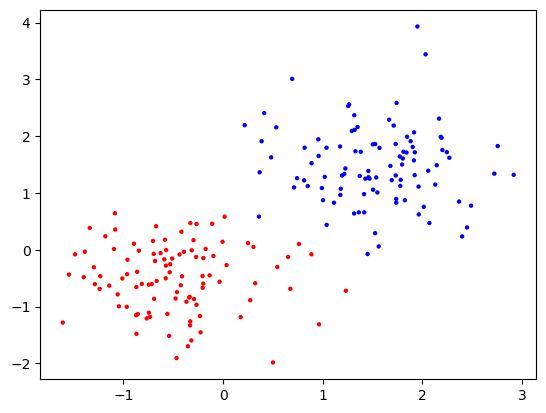

In [185]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2)
m = 100  # 样本数
# 第一组数据
mean_1 = (1.5, 1.5)
cov_1 = [[0.3, 0], [0, 0.35]]
X_1 = np.random.multivariate_normal(mean_1, cov_1, m)
# 第二组数据
mean_2 = (-0.5, -0.5)
cov_2 = [[0.3, 0], [0, 0.35]]
X_2 = np.random.multivariate_normal(mean_2, cov_2, m)

# 显示数据
plt.scatter(X_1[:,0], X_1[:,1], c='b', s=10, edgecolor='none')
plt.scatter(X_2[:,0], X_2[:,1], c='r', s=10, edgecolor='none')
plt.show()

# 处理数据
X = np.concatenate((X_1,X_2), axis=0)
X = np.concatenate((X,np.ones((2*m,1))), axis=1)  # 偏置
Y = np.concatenate((np.zeros((m,1)),np.ones((m,1))), axis=0)  # 标记


## 梯度下降法 P59
$$ \ell(\boldsymbol{\beta})=\sum_{i=1}^{m}(-y_i\boldsymbol{\beta}^{\mathrm{T}}\hat{\boldsymbol x}_i+\ln(1+e^{\boldsymbol{\beta}^{\mathrm{T}}\hat{\boldsymbol x}i})) $$ [推导]：将公式(3.26)代入公式(3.25)可得 $$ \ell(\boldsymbol{\beta})=\sum_{i=1}^{m}\ln\left(y_ip_1(\hat{\boldsymbol x}_i;\boldsymbol{\beta})+(1-y_i)p_0(\hat{\boldsymbol x}_i;\boldsymbol{\beta})\right) $$ 其中$ p_1(\hat{\boldsymbol x}_i;\boldsymbol{\beta})=\cfrac{e^{\boldsymbol{\beta}^{\mathrm{T}}\hat{\boldsymbol x}_i}}{1+e^{\boldsymbol{\beta}^{\mathrm{T}}\hat{\boldsymbol x}_i}},p_0(\hat{\boldsymbol x}_i;\boldsymbol{\beta})=\cfrac{1}{1+e^{\boldsymbol{\beta}^{\mathrm{T}}\hat{\boldsymbol x}i}} $，代入上式可得 $$\begin{aligned} \ell(\boldsymbol{\beta})&=\sum_{i=1}^{m}\ln\left(\cfrac{y_ie^{\boldsymbol{\beta}^{\mathrm{T}}\hat{\boldsymbol x}_i}+1-y_i}{1+e^{\boldsymbol{\beta}^{\mathrm{T}}\hat{\boldsymbol x}i}}\right) \ &=\sum_{i=1}^{m}\left(\ln(y_ie^{\boldsymbol{\beta}^{\mathrm{T}}\hat{\boldsymbol x}_i}+1-y_i)-\ln(1+e^{\boldsymbol{\beta}^{\mathrm{T}}\hat{\boldsymbol x}i})\right) \end{aligned}$$ 由于$ y_i $=0或1，则 $$ \ell(\boldsymbol{\beta}) = \begin{cases} \sum_{i=1}^{m}(-\ln(1+e^{\boldsymbol{\beta}^{\mathrm{T}}\hat{\boldsymbol x}i})), & y_i=0 \ \sum_{i=1}^{m}(\boldsymbol{\beta}^{\mathrm{T}}\hat{\boldsymbol x}_i-\ln(1+e^{\boldsymbol{\beta}^{\mathrm{T}}\hat{\boldsymbol x}i})), & y_i=1 \end{cases} $$ 两式综合可得 $$ \ell(\boldsymbol{\beta})=\sum_{i=1}^{m}\left(y_i\boldsymbol{\beta}^{\mathrm{T}}\hat{\boldsymbol x}_i-\ln(1+e^{\boldsymbol{\beta}^{\mathrm{T}}\hat{\boldsymbol x}_i})\right) $$ 由于此式仍为极大似然估计的似然函数，所以最大化似然函数等价于最小化似然函数的相反数，也即在似然函数前添加负号即可得公式(3.27)。

### 3.30
$$\frac{\partial \ell(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}}=-\sum_{i=1}^{m}\hat{\boldsymbol x}_i(y_i-p_1(\hat{\boldsymbol x}_i;\boldsymbol{\beta}))$$
[解析]：此式可以进行向量化，令$p_1(\hat{\boldsymbol x}_i;\boldsymbol{\beta})=\hat{y}_i$，代入上式得
$$\begin{aligned}
\frac{\partial \ell(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} &= -\sum_{i=1}^{m}\hat{\boldsymbol x}_i(y_i-\hat{y}_i) \\
& =\sum_{i=1}^{m}\hat{\boldsymbol x}_i(\hat{y}_i-y_i) \\
& ={\mathbf{X}^{\mathrm{T}}}(\hat{\boldsymbol y}-\boldsymbol{y}) \\
& ={\mathbf{X}^{\mathrm{T}}}(p_1(\mathbf{X};\boldsymbol{\beta})-\boldsymbol{y}) \\
\end{aligned}$$

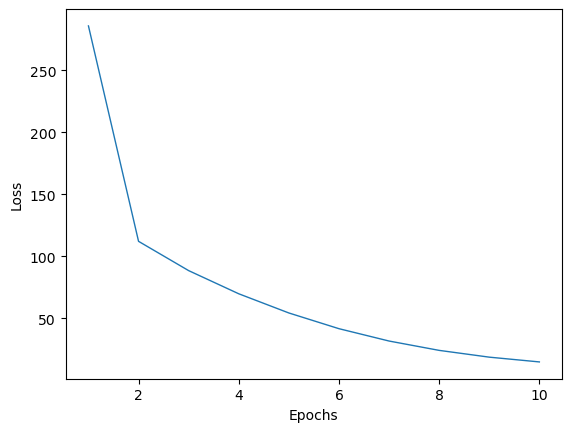

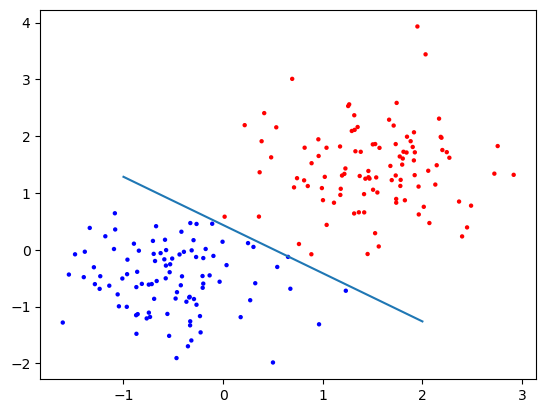

In [186]:
w = np.random.random((3,1))
epochs = 10
lr = 0.1
loss_arr = []

for _ in range(epochs):
    loss = 0    
    Dw = np.zeros((3,1))
    for i in range(2*m):
        xi = X[i,:][:,np.newaxis]
        loss = -Y[i] * w.T @ xi + np.log(1 + np.exp(w.T @ xi)) + loss  # 3.27
        Dw = -Y[i]*xi + (np.exp(w.T @ xi)) / (1 + np.exp(w.T @ xi)) * xi + Dw
    w = w - lr * Dw
    loss_arr.append(loss[0])

plt.plot(list(range(1,epochs+1)), loss_arr, linewidth=1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

for i in range(2*m):
    xi = X[i,:][:,np.newaxis]
    output = 1 / (1 + np.exp(-(w.T @ xi)))
    if output > 0.5:
        plt.scatter(xi[0], xi[1], c='b', s=10, edgecolor='none')
    else:
        plt.scatter(xi[0], xi[1], c='r', s=10, edgecolor='none')
        
plt.plot([-1,2], [-w[0]/w[1]*(-1)-w[2]/w[1],-w[0]/w[1]*(2)-w[2]/w[1]])
plt.show()

## 牛顿法

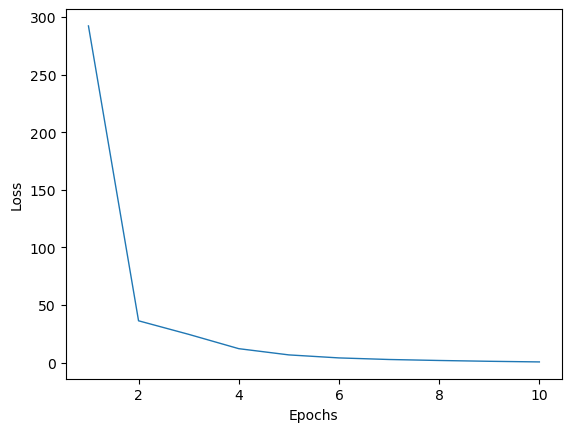

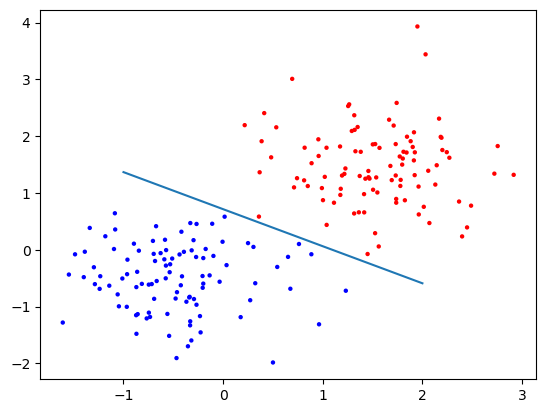

In [187]:
w = np.random.random((3,1))
epochs = 10
loss_arr = []

for _ in range(epochs):
    loss = 0    
    Dw = np.zeros((3,1))
    D2w = np.zeros((3,3))  # Hessian矩阵
    for i in range(2*m):
        xi = X[i,:][:,np.newaxis]
        p1 = (np.exp(w.T @ xi)) / (1 + np.exp(w.T @ xi))
        loss = -Y[i] * w.T @ xi + np.log(1 + np.exp(w.T @ xi)) + loss
        Dw = -Y[i]*xi + p1 * xi + Dw
        D2w = xi @ xi.T * p1 * (1 - p1) + D2w
    w = w - np.linalg.inv(D2w) @ Dw  # 3.29
    loss_arr.append(loss[0])

plt.plot(list(range(1,epochs+1)), loss_arr, linewidth=1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

for i in range(2*m):
    xi = X[i,:][:,np.newaxis]
    output = 1 / (1 + np.exp(-(w.T @ xi)))
    if output > 0.5:
        plt.scatter(xi[0], xi[1], c='b', s=10, edgecolor='none')
    else:
        plt.scatter(xi[0], xi[1], c='r', s=10, edgecolor='none')
        
plt.plot([-1,2], [-w[0]/w[1]*(-1)-w[2]/w[1],-w[0]/w[1]*(2)-w[2]/w[1]])
plt.show()